In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the CSV file
d4 = pd.read_csv("Flight_Ticket_Price_Analysis.csv")
d4

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [4]:
# Display First 5 rows
d4.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [5]:
# summary statistics for numerical features
summary_stats = d4.describe()
summary_stats

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [13]:
d4.dtypes

Unnamed: 0            int64
airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

# Check and handle missing data

In [6]:
# check for missing values [find missing values in each columns]
missing_values = d4.isnull().sum()
missing_values

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [10]:
# 1. Does price vary with Airlines?
# calculate avarage price per airline
avg_price_by_airline = d4.groupby("airline")["price"].mean().sort_values()
avg_price_by_airline

airline
AirAsia       4091.072742
Indigo        5324.216303
GO_FIRST      5652.007595
SpiceJet      6179.278881
Air_India    23507.019112
Vistara      30396.536302
Name: price, dtype: float64

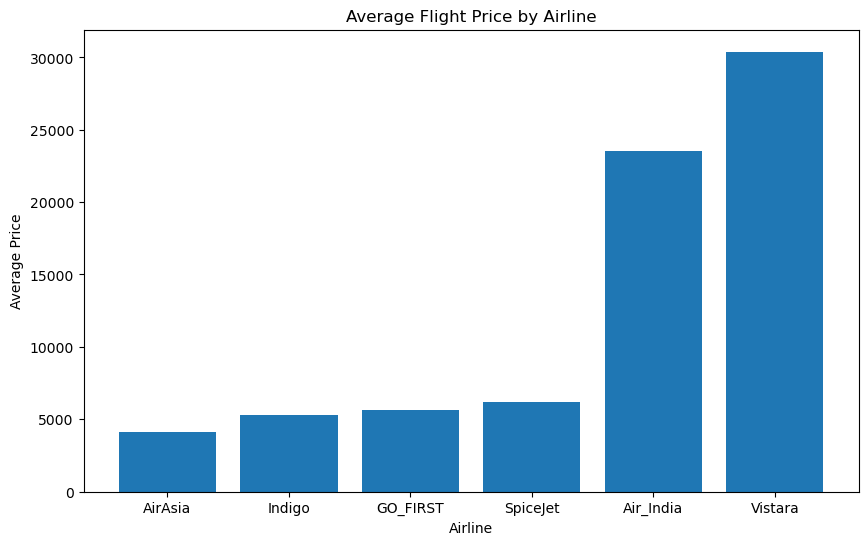

In [11]:
plt.figure(figsize=(10,6))
plt.bar(avg_price_by_airline.index, avg_price_by_airline.values)
plt.title("Average Flight Price by Airline")
plt.xlabel("Airline")
plt.ylabel("Average Price")
plt.show()

In [12]:
# calculate sum of price by airline
Total_price_by_airline = d4.groupby("airline")["price"].sum().sort_values()
Total_price_by_airline

airline
SpiceJet       55681482
AirAsia        65858089
GO_FIRST      130973972
Indigo        229580207
Air_India    1901529790
Vistara      3886470735
Name: price, dtype: int64

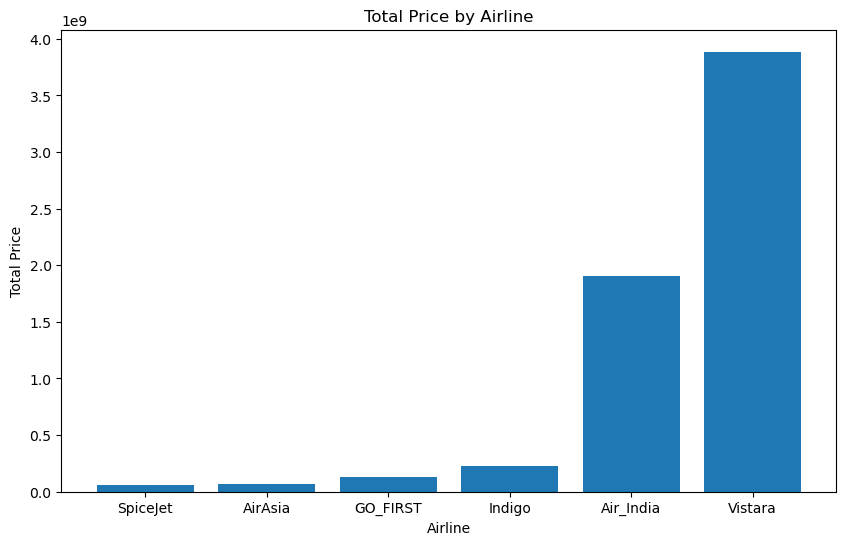

In [13]:
plt.figure(figsize=(10,6))
plt.bar(Total_price_by_airline.index,Total_price_by_airline.values)
plt.title("Total Price by Airline")
plt.xlabel("Airline")
plt.ylabel("Total Price")
plt.show()

# 2. How is the price affected when tickets are bought in just 1 or 2 days before departure?


In [14]:
# Filter flights with 1 or 2 days left before departure
last_minute_flight = d4[d4["days_left"].isin([1,2])]
last_minute_flight

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
298090,298090,Vistara,UK-838,Chennai,Night,one,Evening,Hyderabad,Business,22.83,2,66129
298091,298091,Vistara,UK-834,Chennai,Evening,one,Morning,Hyderabad,Business,16.50,2,82784
298092,298092,Vistara,UK-834,Chennai,Evening,one,Afternoon,Hyderabad,Business,19.42,2,82784
298093,298093,Vistara,UK-834,Chennai,Evening,one,Evening,Hyderabad,Business,23.83,2,82784


In [15]:
# Average price of last minute booking
avg_price_last_minute_booking = last_minute_flight["price"].mean()
avg_price_last_minute_booking

27421.169326390056

In [16]:
# Average price of all other booking
other_flight = d4[~d4["days_left"].isin([1,2])]
avg_other_price = other_flight["price"].mean()
avg_other_price

20757.498484024472

# Does ticket price change based on the departure time and arrival time?

In [20]:
# compare average price by departure time
# average price by departure time 
avg_price_by_departure = d4.groupby("departure_time")["price"].mean().sort_values()
avg_price_by_departure

departure_time
Late_Night        9295.299387
Afternoon        18179.203331
Early_Morning    20370.676718
Evening          21232.361894
Morning          21630.760254
Night            23062.146808
Name: price, dtype: float64

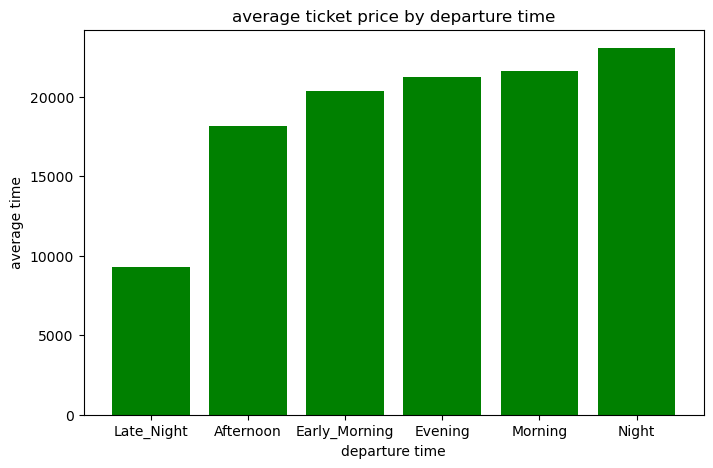

In [21]:
plt.figure(figsize=(8,5))
plt.bar(avg_price_by_departure.index,avg_price_by_departure.values, color ="green")
plt.title("average ticket price by departure time")
plt.xlabel("departure time")
plt.ylabel("average time")
plt.show()

In [23]:
# compare average price by arrival time
avg_price_by_arrival_time = d4.groupby("arrival_time")["price"].mean().sort_values()
avg_price_by_arrival_time

arrival_time
Late_Night       11284.906078
Early_Morning    14993.139521
Afternoon        18494.598993
Night            21586.758341
Morning          22231.076098
Evening          23044.371615
Name: price, dtype: float64

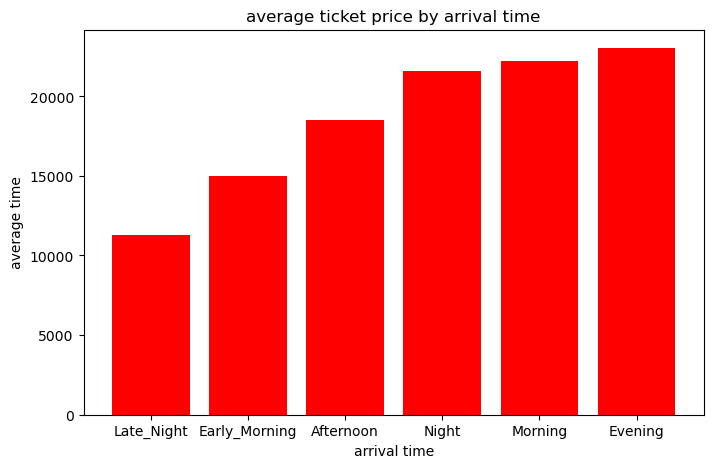

In [24]:
plt.figure(figsize=(8,5))
plt.bar(avg_price_by_arrival_time.index,avg_price_by_arrival_time.values, color ="red")
plt.title("average ticket price by arrival time")
plt.xlabel("arrival time")
plt.ylabel("average time")
plt.show()

In [27]:
# How the price changes with change in Source and Destination?
# create a route column for clarity
d4["route"]=d4["source_city"]+ " to " + d4["destination_city"]

In [29]:
# Group by route and calculate average price
avg_price_by_route = d4.groupby("route")["price"].mean().sort_values(ascending=False)
avg_price_by_route

route
Chennai to Bangalore      25081.850454
Kolkata to Chennai        23660.361040
Bangalore to Kolkata      23500.061229
Bangalore to Chennai      23321.850078
Mumbai to Bangalore       23147.873807
Bangalore to Mumbai       23128.618672
Mumbai to Chennai         22781.899112
Chennai to Mumbai         22765.849647
Kolkata to Bangalore      22744.808428
Chennai to Kolkata        22669.932407
Mumbai to Kolkata         22379.146723
Kolkata to Mumbai         22078.883579
Hyderabad to Chennai      21848.065989
Chennai to Hyderabad      21591.345404
Kolkata to Hyderabad      21500.011397
Hyderabad to Bangalore    21347.177998
Bangalore to Hyderabad    21226.121192
Mumbai to Hyderabad       21004.046705
Hyderabad to Kolkata      20823.893201
Delhi to Kolkata          20566.409418
Hyderabad to Mumbai       20080.865759
Kolkata to Delhi          19422.354559
Delhi to Chennai          19369.881354
Delhi to Mumbai           19355.829812
Chennai to Delhi          18981.863948
Mumbai to Delhi    

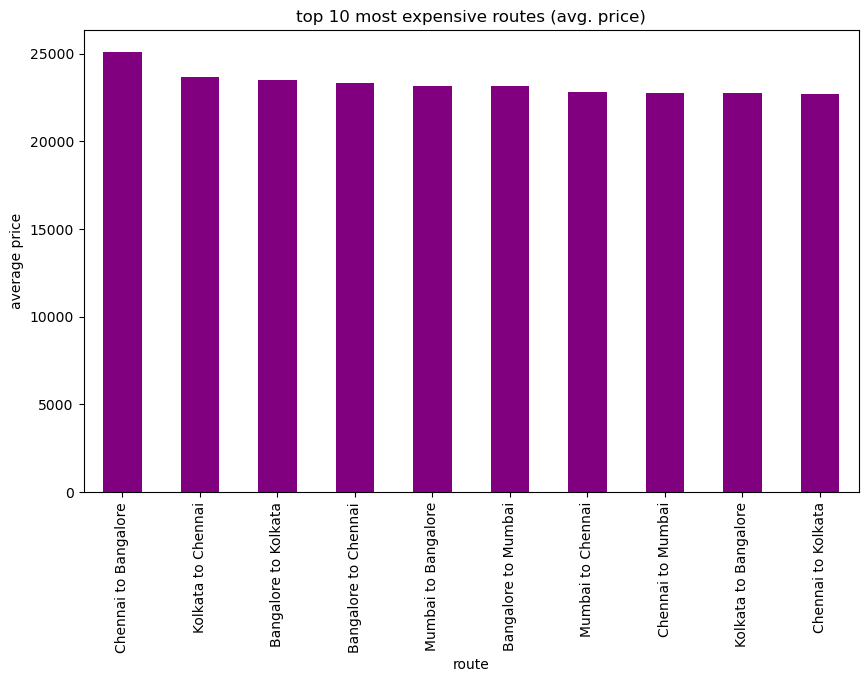

In [30]:
# plot the top 10 most expensive routes
plt.figure(figsize=(10,6))
avg_price_by_route.head(10).plot(kind = "bar", color = "purple")
plt.title ("top 10 most expensive routes (avg. price)")
plt.ylabel ("average price")
plt.xlabel("route")
plt.show() 

In [31]:
# How does the ticket price vary between Economy and Business class?
# calculate the average price for each class
avg_price_by_class = d4.groupby("class")["price"].mean()
print(avg_price_by_class)

class
Business    52540.081124
Economy      6572.342383
Name: price, dtype: float64


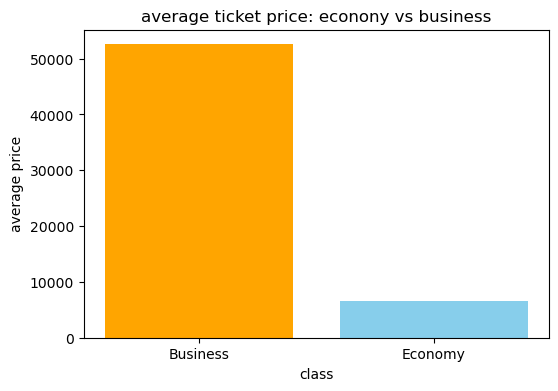

In [32]:
# bar chart for average price by class
plt.figure(figsize=(6,4))
plt.bar(avg_price_by_class.index, avg_price_by_class.values, color=["orange","skyblue"])
plt.title("average ticket price: econony vs business")
plt.xlabel ("class")
plt.ylabel("average price")
plt.show()

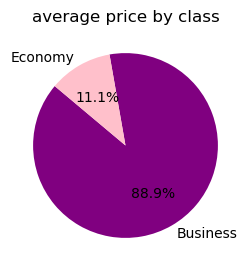

In [34]:
# create the pie chart
avg_price_by_class = d4.groupby("class")["price"].mean()
plt.figure(figsize=(3,3))
plt.pie(
    avg_price_by_class.values,       # remove parenthesis
       labels = avg_price_by_class.index, # use.index instead of keys()
       autopct ="%1.1f%%",                # show percentages on the slices
       colors =["purple", "pink"],        #slice colors
       startangle = 140                   #rotate the start angle for aesthetics
       )
plt.title("average price by class")
plt.show()

In [36]:
avg_price_by_class = d4.groupby("class")["price"].mean()

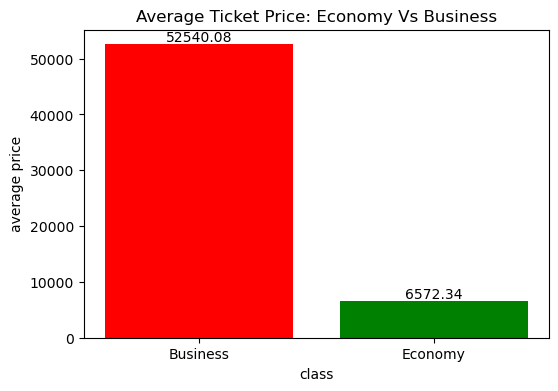

In [35]:
plt.figure(figsize=(6,4))
bars = plt.bar(avg_price_by_class.index, avg_price_by_class.values, color =["red","green"])
#add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(
    bar.get_x() + bar.get_width()/2, # x-coordinate
    height, # y-coordinate(top of the bar)
    f"{height:.2f}",# label text, formatted to 2 decimal places
    ha="center", # horizontal alignment
    va= "bottom" #vertical alignment
)
plt.title("Average Ticket Price: Economy Vs Business")
plt.xlabel("class")
plt.ylabel("average price")
plt.show()